## Introduction to Python for Data Analsyis

### Module 2: Creating meaningful visualizations
Duration: ~ 45'

In this module, we will explore:

- How to use the `plotnine` visualization package in Python
- Basic visulaziations like barblot and histograms
- More complex visulizations like heatmaps
- Use various themes to customize the plots
- Create multiple subplots under the same plot


## Modules required

To visualize data in Python, we will be using an external module called [plotnine](https://plotnine.readthedocs.io/en/stable/). When importing plotnine, we will alias it as `p9`. We also need to import numpy and pandas, using the same aliases as before.

In [1]:
import plotnine as p9
import numpy as np
import pandas as pd

# Basic visualization
With plotnine, you can build a plot using only 2 lines of code:

1. a new `ggplot()` object: this creates a plot object, and holds the details of which variables will be displayed on which axes a.k.a. aesthetics -- `aes()` in short
2. a geom e.g. `geom_point()`, `geom_line()` ...: this specifies the kind of plot that will be created

And that's it! This structure is called the grammar of graphics, and it is used by other plotting libraries in other languages, such as ggplot in R.

## Input data
To keep things simple, we will use an artificial dataset to start with. We can make this with pandas, as covered in the previous module.

In [3]:
example = pd.DataFrame([
    {"City":"Manchester", "Year":1980, "Rainfall":200},
    {"City":"Manchester", "Year":1990, "Rainfall":190},
    {"City":"Manchester", "Year":2000, "Rainfall":160},
    {"City":"Manchester", "Year":2010, "Rainfall":170},
    {"City":"Manchester", "Year":2020, "Rainfall":140},
    {"City":"London", "Year":1980, "Rainfall":100},
    {"City":"London", "Year":1990, "Rainfall":90},
    {"City":"London", "Year":2000, "Rainfall":60},
    {"City":"London", "Year":2010, "Rainfall":70},
    {"City":"London", "Year":2020, "Rainfall":80}
])

example.head()

,City,Year,Rainfall
0,Manchester,1980,200
1,Manchester,1990,190
2,Manchester,2000,160
3,Manchester,2010,170
4,Manchester,2020,140


## Scatter plot
The first plot we will create is a scatter plot, which uses the `geom_point()` geom. The important points to note in the code below are:

- `ggplot()`, `aes()` and `geom_point()` all come from the plotnine module, so they need to have the `p9.` prefix
- the first argument to `ggplot()` is always the dataframe containing the data to be plotted
- the second argument to `ggplot()` is always the `aes()` object, which contains the variables to be used for the x axis, y axis, plot fill and plot colour. These should always be specified in that order.
- the `geom_point()` argument is preceded by a `+` because it is being added to the plot object created by the `ggplot()` function

*Note: I have separated the commands across multiple lines to make it easier to read. When doing this, the whole chunk of code needs to be encapsulated in brackets*

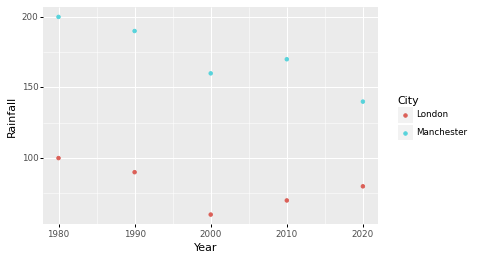

<ggplot: (392207427)>

In [4]:
(
# create the plot object, and specify which variables should be placed on the x & y axes, and which should be used to fill and colour the plot
p9.ggplot(example, p9.aes("Year", "Rainfall", colour = "City"))
    # specify a scatter plot
    + p9.geom_point()
)


## Line plot
To create a line plot, we can use the same `ggplot()` call as we used for the scatter plot above, and this will keep the same variables for the *x*, *y*, *fill* and *colour*. The only thing that needs to change about the code is the **geom**. In this case, we will use `geom_line()`:

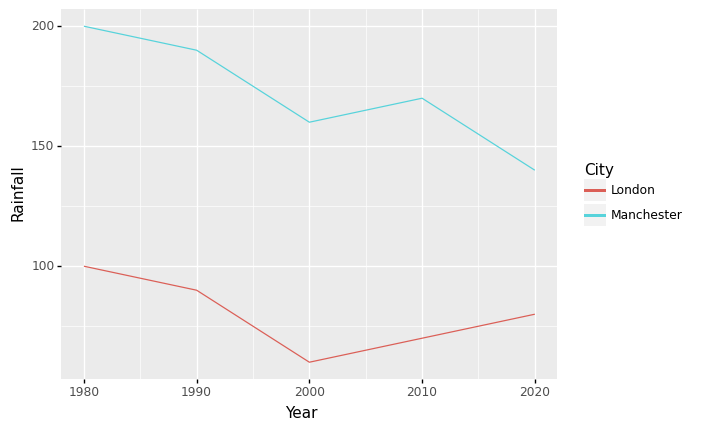

<ggplot: (392397192)>

In [5]:
(
# the ggplot call is exactly the same as the scatter plot
p9.ggplot(example, p9.aes("Year", "Rainfall", fill="City", colour="City"))
    # specify a line plot
    + p9.geom_line()
)

We can also combine multiple plot types together. In this case we will combine the line plot along with the scatter plot we created before. Plots in `plotnine` are built additively so we put both visulizations inside the same `ggplot` object

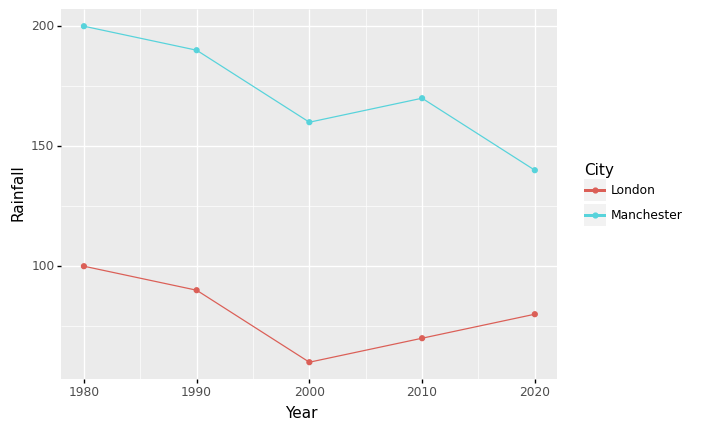

<ggplot: (394004791)>

In [12]:
(
# create the plot object, and specify which variables should be placed on the x & y axes, and which should be used to fill and colour the plot
p9.ggplot(example, p9.aes("Year", "Rainfall", colour = "City"))
    # specify a scatter plot
    + p9.geom_point()
    # specify a line plot
    + p9.geom_line()
)


## Bar chart
To create a bar chart, we again only need to change the **geom**. In this case, we will use `geom_col()`:

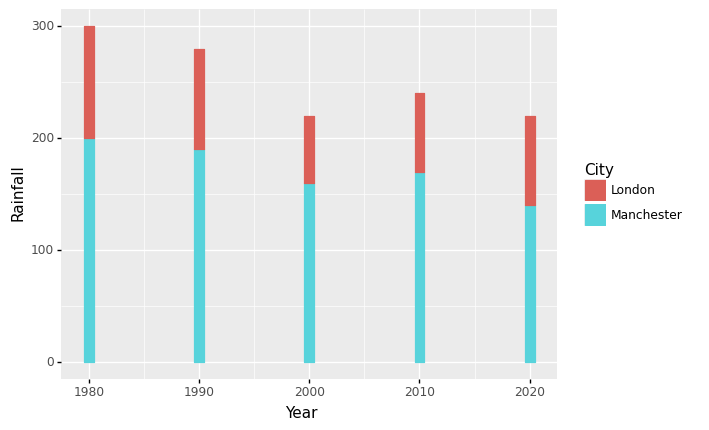

<ggplot: (392511229)>

In [13]:
(
# the ggplot call is exactly the same as the scatter plot
p9.ggplot(example, p9.aes("Year", "Rainfall", fill="City", colour="City"))
    # specify a bar chart
    + p9.geom_col()
)

By default `geom_col()` stacks the bars for the same x axis variable on top of each other, but we can place them next to each other by using the `position` argument:

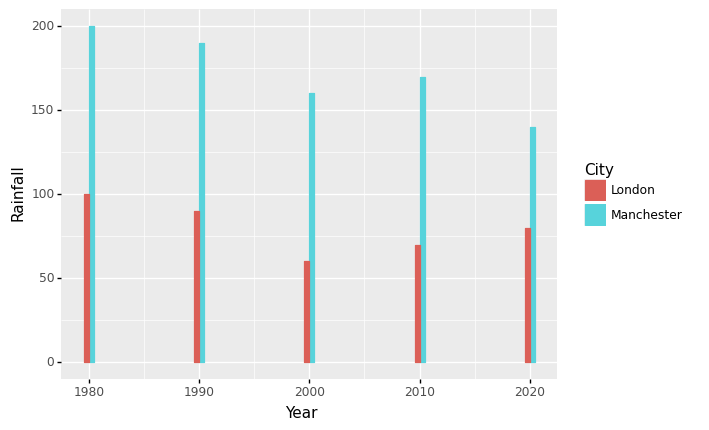

<ggplot: (393976754)>

In [14]:
(
# the ggplot call is exactly the same as the scatter plot
p9.ggplot(example, p9.aes("Year", "Rainfall", fill="City", colour="City"))
    # specify a bar chart
    + p9.geom_col(position="dodge")
)

## Box plot
To create a box plot that visualizes the rainfall for the two cities, we need to use a different **geom** and change the x axis argument. In this case, we will use `geom_box()` and replace Year with City in the `aes()` call:

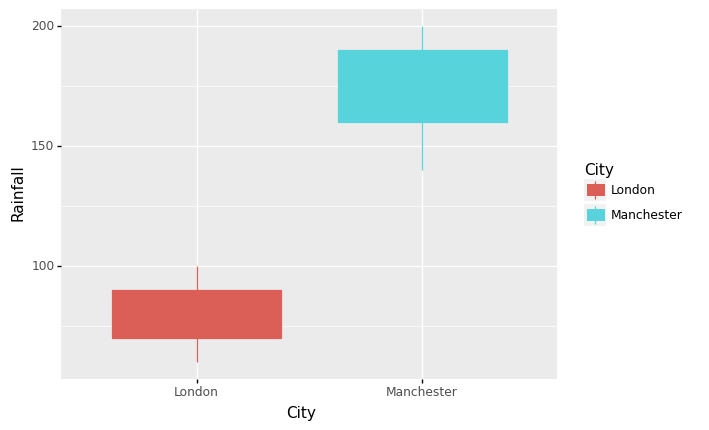

<ggplot: (392371821)>

In [16]:
(
# the ggplot call is exactly the same as the scatter plot
p9.ggplot(example, p9.aes("City", "Rainfall", fill="City", colour="City"))
    # specify a box plot
    + p9.geom_boxplot()
)

## Histograms
Histograms can be very useful to visualize the distribution of a variable. To generate a histogram, we use `geom_histogram`. An important difference between this plot and the previous plots is that for histograms, we only specify the x axis variable within the `aes()` object, and we leave out the y axis variable:

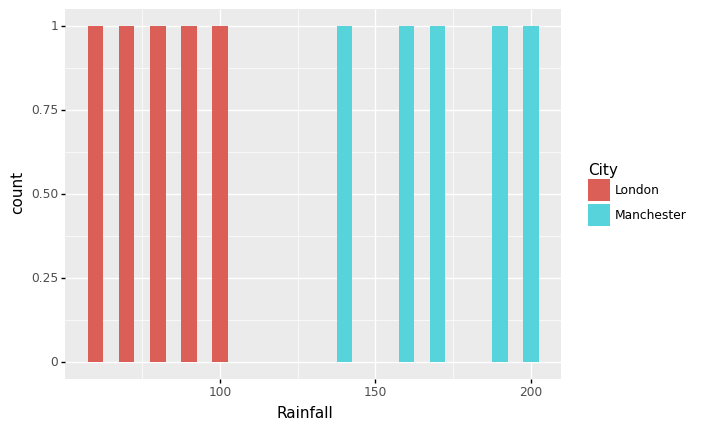

<ggplot: (394084190)>

In [17]:
(
# the aes object contains only the variable that will be plotted on the x axis i.e. the one for which we want to generate a distribution
p9.ggplot(example, p9.aes("Rainfall", fill="City"))
    # specify a histogram
    + p9.geom_histogram(binwidth=5)
)

# Advanced visualization

## Input data
To create some more advanced plots, we will use a more complex dataset: the clinical and expression data from the METABRIC project, as used in the previous module. First we will read the data in as a pandas dataframe, using `.dropna()` method to remove any rows with missing data, and then print out the first 5 rows of the dataframe using the `.head()` method.

In [20]:
metabric = pd.read_csv("../data/metabric_clinical_and_expression_data.csv").dropna()
metabric.head()

,Patient_ID,Cohort,Age_at_diagnosis,Survival_time,Survival_status,Vital_status,Chemotherapy,Radiotherapy,Tumour_size,Tumour_stage,...,Integrative_cluster,Mutation_count,ESR1,ERBB2,PGR,TP53,PIK3CA,GATA3,FOXA1,MLPH
1,MB-0002,1,43.19,84.633333,LIVING,Living,NO,YES,10.0,1.0,...,4ER+,2.0,10.047059,9.729606,7.505424,6.192507,5.757727,11.251197,11.843989,12.536570
4,MB-0008,1,76.97,41.366667,DECEASED,Died of Disease,YES,YES,40.0,2.0,...,9,2.0,11.276581,9.956267,7.331223,6.337951,5.817818,9.719781,11.625006,12.161961
5,MB-0010,1,78.77,7.800000,DECEASED,Died of Disease,NO,YES,31.0,4.0,...,7,4.0,11.239750,9.739996,5.954311,5.419711,6.123056,9.787085,12.142178,11.433164
8,MB-0028,1,86.41,36.566667,DECEASED,Died of Other Causes,NO,YES,16.0,2.0,...,9,4.0,12.521038,10.678267,5.325554,6.220372,6.250678,10.260059,12.148375,10.936002
9,MB-0035,1,84.22,36.266667,DECEASED,Died of Disease,NO,NO,28.0,2.0,...,3,5.0,7.536847,11.514514,5.587666,6.411477,5.988243,10.212610,12.804542,13.474571


## Layered plots
As shown in the last section, a variety of simple plots can be generated by changing just the **geom**. However, we can construct more complex plots by layering different geoms on top of each other. This is particularly useful when we want to highlight a broad pattern in a noisy dataset: we can use one layer to display a line to visualize a model fit to the data, and another layer to show the raw data in the background. There are two things worth noting here:
1. By passing the `colour` and `size` arguments to `geom_point()` we can specify the colour and size of the points
2. We are using the `stat_smooth()` layer to plot a line of model fit on top of the raw data

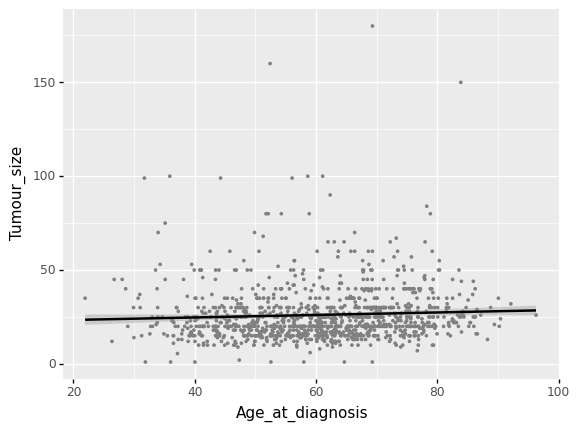

<ggplot: (696765260)>

In [21]:
(
p9.ggplot(metabric, p9.aes("Age_at_diagnosis", "Tumour_size"))
 + p9.geom_point(colour="grey", size=0.5)
 + p9.stat_smooth()
)

## Faceted plots
When a large dataset contains a discrete variable, it can be useful to generate separate plots for each value of the discrete variable, so that we can tease apart patterns that might only be present in a subset of the data. For example, patients in the metabric dataset are each assigned a vital status, but each vital status might have a different tumour size distribution. In plotnine, separate plots can be generated by creating a **faceted** plot, where each facet represents a different subset of the data. To do this, we add the `facet_wrap()` parameter to the plot. The arguments that we pass to `facet_wrap()` are very important:
1. The first argument must always be the variable that we want to generate separate plots for, and we must always add a `~` before it
2. We can use the `scales` argument to make the range of the x axis, y axis, or both axes independent of each other. The default is to use the same axis ranges for all facets, but when there is wide variation in a variable it can be useful to make them independent. In this case there are different numbers of patients in the different vital status classes, so specifying independent y axis ranges allows us to see their distributions more clearly
3. We can use the `ncol` argument to specify the number of columns for the plot. By default the plots will be placed side-by-side until there is no more horizontal space, but we can place them on top of each other by specifying one column

/Users/leosouliotis/Documents/ODSC/.venv/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/Users/leosouliotis/Documents/ODSC/.venv/lib/python3.9/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 72'. Pick better value with 'binwidth'.


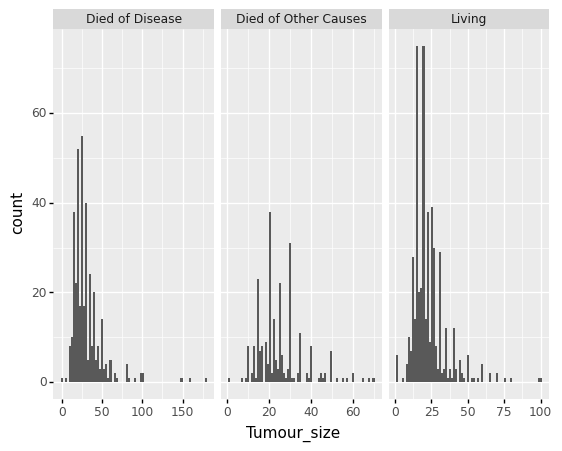

<ggplot: (696783785)>

In [22]:
(
p9.ggplot(metabric, p9.aes("Tumour_size"))
 + p9.geom_histogram()
 + p9.facet_wrap("~Vital_status", scales="free_x", ncol=3)
)

## Heat maps
When we want to explore the relationship between 2 discrete variables and a continuous variable, a heatmap can be very useful. We use `geom_tile()` to generate a different block for each combination of the discrete variables, and use the `fill` argument in the `aes()` object to specify which continuous variable to use for colouring the heatmap. It is worth noting in the example below that we can filter the dataset within the `ggplot()` call:

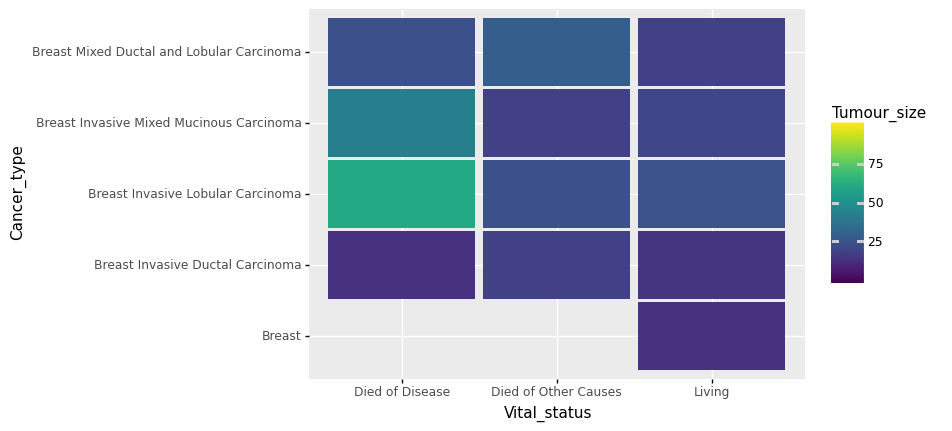

<ggplot: (393987226)>

In [23]:
# we can see from the histograms above that there are a few very large tumours, so we will filter these out as we pass the data into the plot
(
p9.ggplot(metabric[metabric["Tumour_size"]<100], p9.aes("Vital_status", "Cancer_type", fill="Tumour_size"))
 + p9.geom_tile(p9.aes(width=0.95, height=0.95))
)

## Nested plots
In complex datasets there may be a relationship between two variables that differs according to the value of a third variable. To visualize this, we can plot one variable on the x axis, another variable on the y axis, and use the `fill` parameter in the `aes()` object to split the x axis by a third variable. For example, we can compare the mutation count between different vital statuses, each subdivided by cancer type:

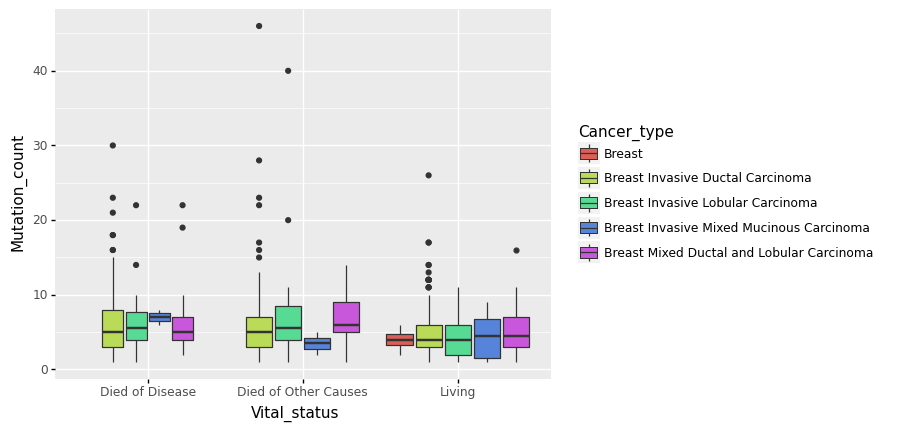

<ggplot: (392495255)>

In [24]:
(
p9.ggplot(metabric, p9.aes("Vital_status", "Mutation_count", fill="Cancer_type"))
    + p9.geom_boxplot()
)

## Plot formatting
We often want to make specific changes to the format of our plots, and plotnine offers enormous flexibility for this. In the nested plot above, we may want to add a title, remove the underscores in the axes and legend titles, and change the order of the vital statuses. We can make these changes by specifying the following objects:
- `ggtitle`: add a title to the plot
- `xlab`: specify the x axis label
- `ylab`: specify the y axis label
- `scale_fill_discrete`: control the name, order or colours of the variable used to fill the plot
- `scale_x_discrete`: control the name, order or colours of the variable on the x axis. By setting the `limits` parameter to a list, we can specify the order of the vital statuses

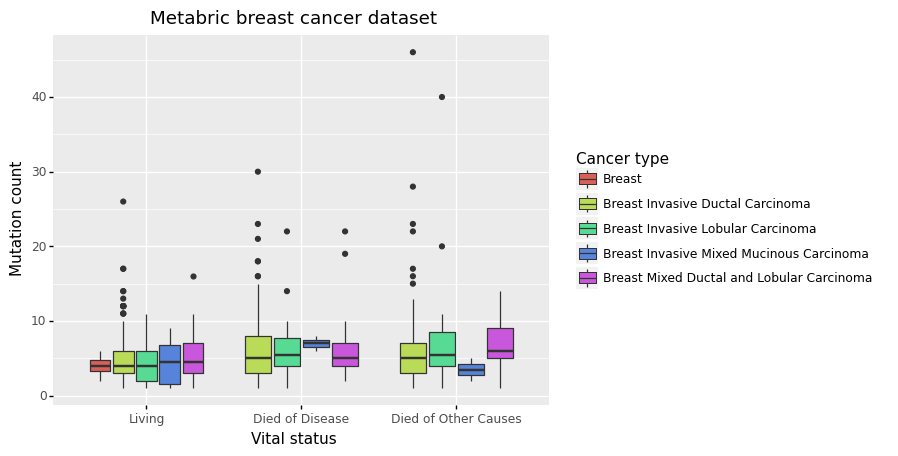

<ggplot: (275414206)>

In [25]:
(
p9.ggplot(metabric, p9.aes(x="Vital_status", y="Mutation_count", fill="Cancer_type"))
    + p9.geom_boxplot()
    + p9.ggtitle("Metabric breast cancer dataset")
    + p9.ylab("Mutation count")
    + p9.xlab("Vital status")
    + p9.scale_fill_discrete(name = "Cancer type")
    + p9.scale_x_discrete(limits=["Living", "Died of Disease", "Died of Other Causes"])
)

## Themes
In any plot generated by plotnine, many cosmetic details are controlled by the **theme**, including the font, background colour, line thicknesses etc. plotnine comes with a number of pre-defined themes, which allow us to make dramatic changes to how a plot looks by adding just one more line to our existing plotting code. Let's go back to the plot of age at diagnosis versus tumour size, but this time colour the points by vital status:

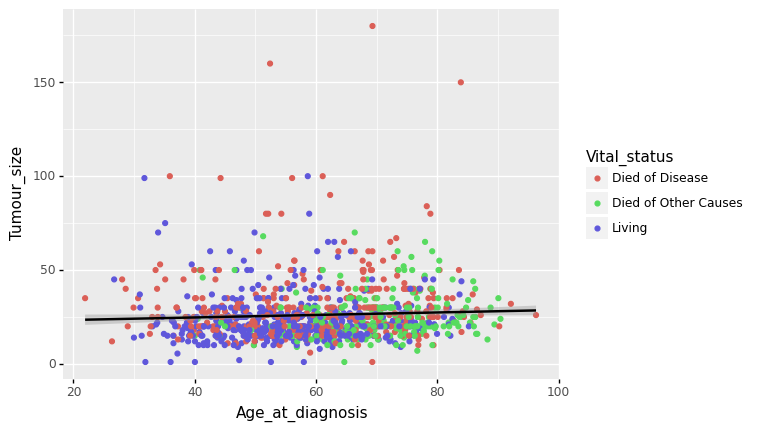

<ggplot: (394047579)>

In [26]:
(
p9.ggplot(metabric, p9.aes("Age_at_diagnosis", "Tumour_size"))
 + p9.geom_point(p9.aes(colour="Vital_status"))
 + p9.stat_smooth()
)

By using `theme_minimal()` we can remove the grey background and axis tickmarks, and make the minor gridlines much fainter:

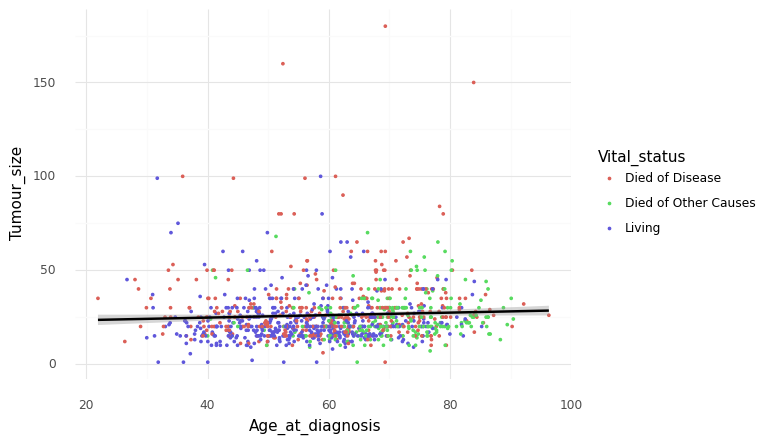

<ggplot: (697124169)>

In [27]:
(
p9.ggplot(metabric, p9.aes("Age_at_diagnosis", "Tumour_size"))
 + p9.geom_point(p9.aes(colour="Vital_status"), size=0.5)
 + p9.stat_smooth()
 + p9.theme_minimal()
)

`theme_matplotlib()` removes the gridlines and grey background, and add minor tickmarks and a border to the plot:

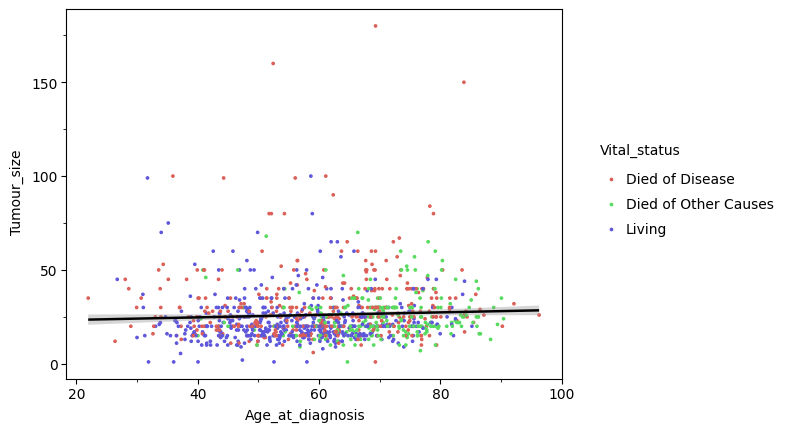

<ggplot: (698353119)>

In [28]:
(
p9.ggplot(metabric, p9.aes("Age_at_diagnosis", "Tumour_size"))
 + p9.geom_point(p9.aes(colour="Vital_status"), size=0.5)
 + p9.stat_smooth()
 + p9.theme_matplotlib()
)

`theme_xkcd()` gives the plot a hand-drawn feel, following the style of the [xkcd webcomic](https://xkcd.com/):

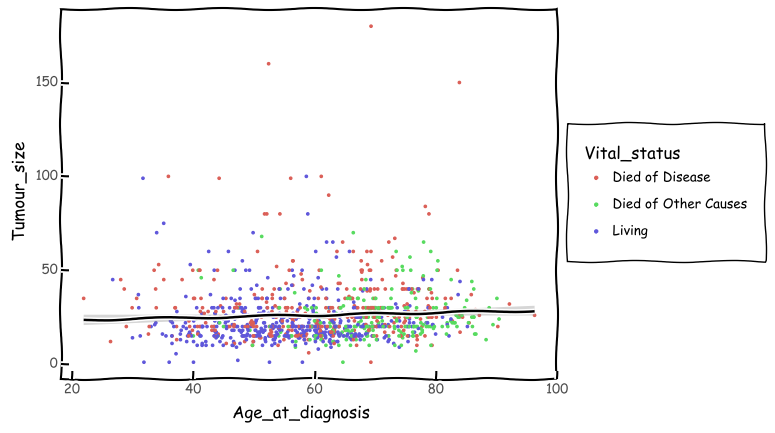

<ggplot: (698399025)>

In [29]:
(
p9.ggplot(metabric, p9.aes("Age_at_diagnosis", "Tumour_size"))
 + p9.geom_point(p9.aes(colour="Vital_status"), size=0.5)
 + p9.stat_smooth()
 + p9.theme_xkcd()
)

As well as using the settings from pre-defined themes, we can specify changes to the theme directly. To do this, we add the `theme()` object to the plot, and make changes to specific aspects of the plot within the call to the object. For example, we can create a version of the scatterplot above that doesn't have a legend title. To do this, we set the value of the `legend_title` parameter as `element_blank()`. `element_blank()` is a special object from the plotnine module that serves as an empty placeholder, and it can be used to remove the values for many different plot elements such as axis labels, axis values etc. In this case, it removes the legend title:

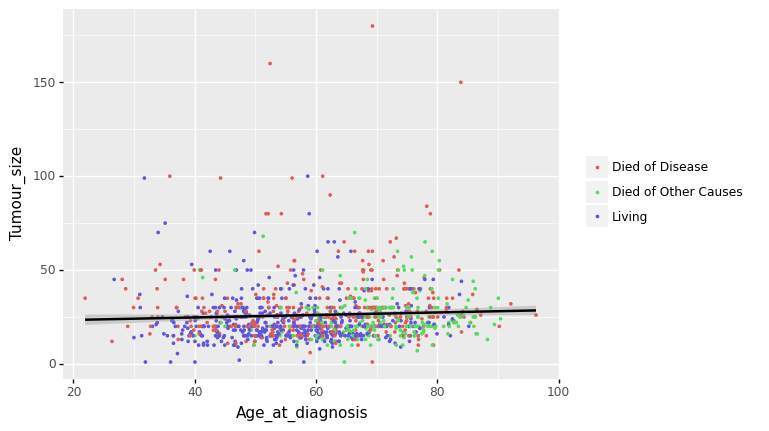

<ggplot: (698445270)>

In [30]:
(
p9.ggplot(metabric, p9.aes("Age_at_diagnosis", "Tumour_size"))
 + p9.geom_point(p9.aes(colour="Vital_status"), size=0.5)
 + p9.stat_smooth()
 + p9.theme(legend_title = p9.element_blank())
)

We can combine specific changes and pre-existing themes by first specifying the theme, and then using the `theme()` object to specify changes to that theme. When doing this, we must always apply the pre-defined theme first, otherwise the specific changes we have made using the `theme()` object will be overwritten. For example, we can apply the matplotlib theme, and then remove the legend title by using the `theme()` object:

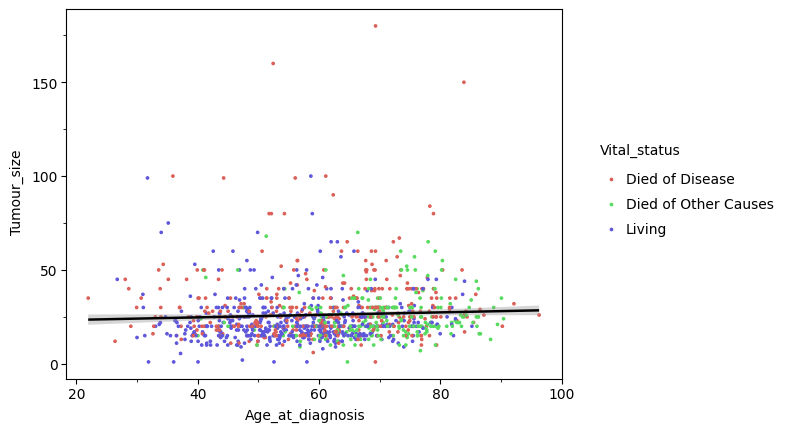

<ggplot: (698483975)>

In [31]:
(
p9.ggplot(metabric, p9.aes("Age_at_diagnosis", "Tumour_size"))
 + p9.geom_point(p9.aes(colour="Vital_status"), size=0.5)
 + p9.stat_smooth()
 + p9.theme(legend_title = p9.element_blank())
 + p9.theme_matplotlib()
)

## Saving plots
Once we have produced a plot, we usually want to save it as a separate file. In Python, we can do this by assigning the `ggplot()` call to a variable, and then calling the `.save()` method on this variable. The first argument to `.save()` is always the file name (or full file path), with the file type determined by the file name ending. We can also specify the height and width of the plot, and the units of measurement for these dimensions.

In [ ]:
age_vs_size = (
p9.ggplot(metabric, p9.aes("Age_at_diagnosis", "Tumour_size"))
 + p9.geom_point(colour="grey", size=0.5)
 + p9.stat_smooth()
 + p9.theme_matplotlib()
)
age_vs_size.save("metabric_age_size.pdf", height=100, width=100, units="mm")
age_vs_size.save("metabric_age_size.eps", height=100, width=100, units="mm")
#age_vs_size

## Suppressing warning messages
When using plotnine for data visualization, a lot of warning messages can be generated. For example, 

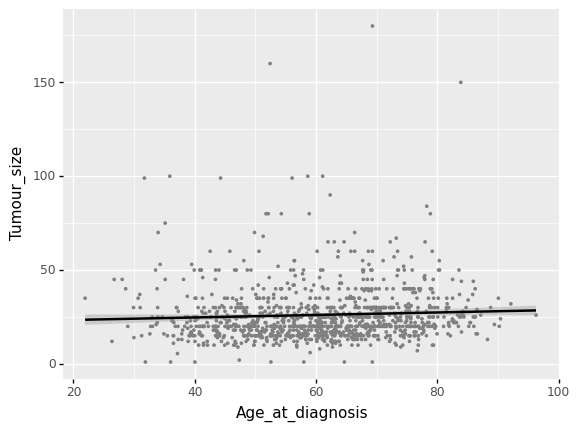

<ggplot: (698486032)>

In [32]:
(
p9.ggplot(metabric, p9.aes("Age_at_diagnosis", "Tumour_size"))
 + p9.geom_point(colour="grey", size=0.5)
 + p9.stat_smooth()
)

These messages are often informative, but they can be undesirable if we want to use the notebook to communicate our findings. To suppress these messages, we can use the `filterwarnings()` function from the `warnings` module. By setting this to "ignore", we will suppress warning messages from plotnine:

In [ ]:
import warnings
warnings.filterwarnings('ignore')
(
p9.ggplot(metabric, p9.aes("Age_at_diagnosis", "Tumour_size"))
 + p9.geom_point(colour="grey", size=0.5)
 + p9.stat_smooth()
)

**Use this with caution**: all warnings from all Python modules will be suppressed, so it is usually sensible to run your code with warnings printed first, check the messages are safe to ignore, and then rerun your code with the messages suppressed.

### Q&A

### Duration: ~10'